In [1]:
import os
import django
from django.db import connection
import sys
import datetime
sys.path.append('../')
import pandas as pd
import matplotlib.pyplot as plt
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'activity_viewer.settings')
django.setup()

In [2]:
from dashboard.models import Log
from django.db.models import Count

                  count
ip                     
128.208.9.147    122403
104.132.0.68     115273
129.93.227.91     96147
149.166.168.180   64913
202.113.53.211    56157
128.231.2.242     47687
131.175.120.88    44234
169.230.18.180    43709
141.80.238.6      42138
129.215.120.99    37434


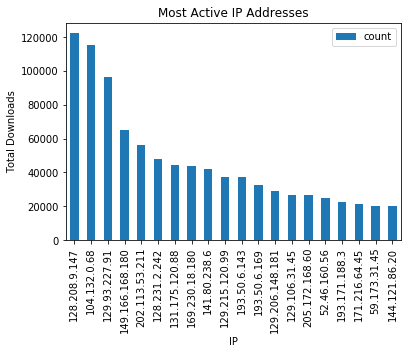

CPU times: user 194 ms, sys: 22 ms, total: 216 ms
Wall time: 1min 19s


In [3]:
%%time
ip_addresses = Log.objects.values_list('ip_address').filter(http_status=200)
# Group by ip address using the Django ORM to query
ip_address_totals = ip_addresses.annotate(count=Count('ip_address')).order_by('-count')
ip_address_totals_df = pd.DataFrame(ip_address_totals, columns=['ip', 'count'])
ip_address_totals_df.set_index('ip', inplace=True)
print(ip_address_totals_df.head(10))
axes = ip_address_totals_df.head(20).plot(kind='bar')
axes.set(xlabel='IP', ylabel='Total Downloads', title='Most Active IP Addresses')
plt.show()

As we can see, this does not paint the whole picture. There are a lot of ip addresses that download a small amount of data, usually specific files.

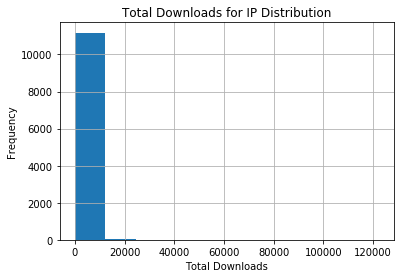

In [4]:
ip_addresses_df = pd.DataFrame(ip_addresses, columns=['ip'])
axes = ip_addresses_df.groupby(by='ip').size().sort_values(ascending=False).hist()
axes.set(xlabel='Total Downloads', ylabel='Frequency', title='Total Downloads for IP Distribution')
plt.show()